In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [3]:
nameCSV = 'hydro_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2034

## Calculate mean value of each satellite track - technically shouldn't have to do this since it should be in the make file??

In [4]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 1856


## Make ndarray(alltime) and list(days2) that has dates

In [5]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [6]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.2381179332733154 1985-04-09 08:40:00.762408
2.335000276565552 1985-05-02 10:19:42.794643
1.6103999614715576 1985-05-05 10:28:31.310936
2.806500196456909 1985-05-28 12:08:08.132813
1.6183530092239382 1985-06-26 03:00:05.350414
0.43242108821868896 1985-08-08 17:15:39.942435
1.225307822227478 1985-09-23 20:34:46.584136
1.1935999393463137 1985-11-12 00:02:04.968699
0.4020000398159027 1985-11-14 13:05:19.043750
0.2772000133991241 1985-12-10 14:53:17.146876
1.3723334074020386 1986-01-20 04:59:25.847330
1.9206666946411133 1986-01-23 05:08:08.691408
0.5419999957084656 1986-02-12 06:38:26.406249
0.54666668176651 1986-02-15 06:47:09.250327
2.8298890590667725 1986-04-02 10:05:05.468750
1.30566668510437 1986-05-18 13:22:42.188367
1.4013333320617676 1986-06-10 15:01:19.719617
0.8573750257492065 1986-07-03 16:39:51.374022
1.4612727165222168 1986-09-10 21:35:17.028408
0.4185000061988831 1986-09-16 10:47:24.924219
0.467600017786026 1986-11-13 02:02:23.975000
1.2897223234176636 1986-11-30 03:15:04.79

1.076250076293945 2010-05-23 23:46:30.462891
1.0153181769631126 2010-05-24 12:10:40.139584
3.650000095367432 2010-05-28 15:00:19.749999
3.662889268663194 2010-06-07 12:58:51.335547
0.9187143189566476 2010-06-09 12:07:48.494420
1.2397500038146974 2010-06-17 10:57:22.905078
1.2698125839233398 2010-06-27 08:55:54.158203
2.1729410956887643 2010-06-27 23:46:29.735491
1.8253636360168457 2010-06-28 12:10:39.412499
1.6612501144409182 2010-07-07 06:54:24.867188
2.9194002151489262 2010-07-14 12:07:48.435936
2.4969286918640137 2010-07-17 04:52:56.340625
2.599944432576497 2010-07-31 22:56:35.603122
1.5410001754760745 2010-08-01 23:46:31.622070
0.6870555877685547 2010-08-02 12:10:41.298439
1.1172727346420288 2010-08-02 14:15:14.151442
1.4224000930786134 2010-08-08 01:53:48.822537
1.4327144622802734 2010-08-15 22:48:31.546132
2.8738335503472223 2010-08-18 12:07:49.881251
1.27189998626709 2010-08-25 20:47:03.266406
0.8798824198105756 2010-09-04 18:45:35.009673
1.950416684150696 2010-09-05 23:46:31.20

In [10]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

 Number of Satellite Tracks: 1856


In [8]:
days2

[datetime.datetime(1985, 4, 9, 8, 40, 0, 762408),
 datetime.datetime(1985, 5, 2, 10, 19, 42, 794643),
 datetime.datetime(1985, 5, 5, 10, 28, 31, 310936),
 datetime.datetime(1985, 5, 28, 12, 8, 8, 132813),
 datetime.datetime(1985, 6, 26, 3, 0, 5, 350414),
 datetime.datetime(1985, 8, 8, 17, 15, 39, 942435),
 datetime.datetime(1985, 9, 23, 20, 34, 46, 584136),
 datetime.datetime(1985, 11, 12, 0, 2, 4, 968699),
 datetime.datetime(1985, 11, 14, 13, 5, 19, 43750),
 datetime.datetime(1985, 12, 10, 14, 53, 17, 146876),
 datetime.datetime(1986, 1, 20, 4, 59, 25, 847330),
 datetime.datetime(1986, 1, 23, 5, 8, 8, 691408),
 datetime.datetime(1986, 2, 12, 6, 38, 26, 406249),
 datetime.datetime(1986, 2, 15, 6, 47, 9, 250327),
 datetime.datetime(1986, 4, 2, 10, 5, 5, 468750),
 datetime.datetime(1986, 5, 18, 13, 22, 42, 188367),
 datetime.datetime(1986, 6, 10, 15, 1, 19, 719617),
 datetime.datetime(1986, 7, 3, 16, 39, 51, 374022),
 datetime.datetime(1986, 9, 10, 21, 35, 17, 28408),
 datetime.datetime(

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$


In [11]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [12]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[5.84620415 5.63695702 6.05039616 ... 5.12231117 6.9817432  7.86692226]
2034 2034


In [14]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

1856
1856


In [15]:
dayswh

array([2.23811793, 2.33500028, 1.61039996, ..., 1.51025009, 1.31061109,
       1.69944456])

In [16]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz})
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

,date,period,wh
0,1985-04-09 08:40:00.762408,5.846204,2.238118
1,1985-05-02 10:19:42.794643,5.636957,2.335000
2,1985-05-05 10:28:31.310936,6.050396,1.610400
3,1985-05-28 12:08:08.132813,6.706180,2.806500
4,1985-06-26 03:00:05.350414,5.822617,1.618353
5,1985-08-08 17:15:39.942435,3.832805,0.432421
6,1985-09-23 20:34:46.584136,5.609896,1.225308
7,1985-11-12 00:02:04.968699,5.444104,1.193600
8,1985-11-14 13:05:19.043750,4.147817,0.402000
9,1985-12-10 14:53:17.146876,3.297859,0.277200


## Get rolling average wh based on 30 Days

In [17]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [18]:
yrolling

,date,period,wh
0,1985-04-09 08:40:00.762408,5.846204,2.238118
1,1985-05-02 10:19:42.794643,5.741581,2.286559
2,1985-05-05 10:28:31.310936,5.844519,2.061173
3,1985-05-28 12:08:08.132813,6.131178,2.250633
4,1985-06-26 03:00:05.350414,6.264398,2.212427
5,1985-08-08 17:15:39.942435,3.832805,0.432421
6,1985-09-23 20:34:46.584136,5.609896,1.225308
7,1985-11-12 00:02:04.968699,5.444104,1.193600
8,1985-11-14 13:05:19.043750,4.795961,0.797800
9,1985-12-10 14:53:17.146876,4.296593,0.624267


In [20]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

## Incorporate rolling average wh into dataframe

In [23]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling })
df.to_csv("./hydro_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,wh,wh_rolling
0,1985-04-09 08:40:00.762408,5.846204,5.846204,2.238118,2.238118
1,1985-05-02 10:19:42.794643,5.636957,5.741581,2.335000,2.286559
2,1985-05-05 10:28:31.310936,6.050396,5.844519,1.610400,2.061173
3,1985-05-28 12:08:08.132813,6.706180,6.131178,2.806500,2.250633
4,1985-06-26 03:00:05.350414,5.822617,6.264398,1.618353,2.212427
5,1985-08-08 17:15:39.942435,3.832805,3.832805,0.432421,0.432421
6,1985-09-23 20:34:46.584136,5.609896,5.609896,1.225308,1.225308
7,1985-11-12 00:02:04.968699,5.444104,5.444104,1.193600,1.193600
8,1985-11-14 13:05:19.043750,4.147817,4.795961,0.402000,0.797800
9,1985-12-10 14:53:17.146876,3.297859,4.296593,0.277200,0.624267


## Calculate Wave Power

### Wave Energy Flux
$P = ECg$

### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$



## Split into two, either side of date gap

In [30]:
print df.date[57]
print df.date[58]

1988-08-04 22:52:31.958706
1992-10-14 08:57:09.004934


In [31]:
#Period normal    
time1 = df.period[0:57]
time2 = df.period[58:-1]

#Period rolling
tt1 = df.period_rolling[0:57]
tt2 = df.period_rolling[58:-1]
        


#Hs normal
y1 = df.wh[0:57]
y2 = df.wh[58:-1]

#Hs rolling
yy1 = df.wh_rolling[0:57]
yy2 = df.wh_rolling[58:-1]


#Date
x1=df.date[0:57]
x2 = df.date[58:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


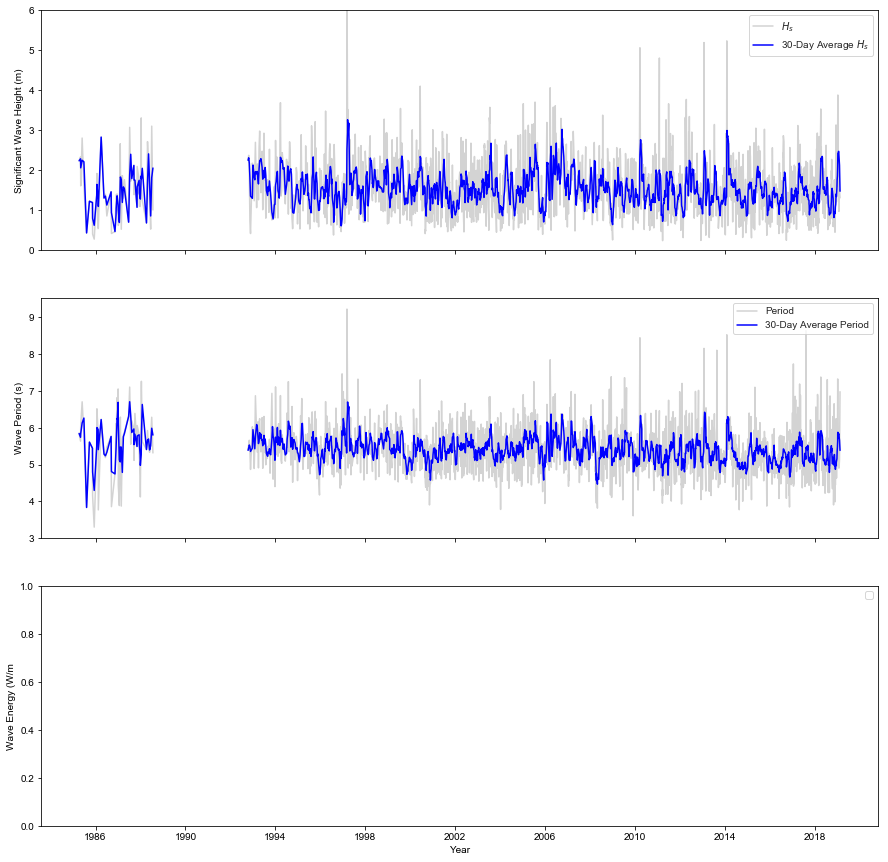

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
#ax3.plot(x1, time1)
#ax3.plot(x1,tt1)

#After date break
#ax3.plot(x2,time2)
#ax3.plot(x2,tt2)

ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (W/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')

plt.savefig("Hydrographers_timeseries")